In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kruthika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv("data/trials.csv")

In [4]:
df.head()

,nctid,description,label
0,NCT02464748,MND is often referred to as amyotrophic latera...,ALS
1,NCT00362362,OBJECTIVE:||The causes of sporadic motor neuro...,ALS
2,NCT03154450,Non-invasive ventilation (NIV) use in patients...,ALS
3,NCT03487263,The objectives of this study are to determine:...,ALS
4,NCT04454892,"With the development of supportive measures, t...",ALS


In [5]:
''' Checking for missing values '''
df.isnull().sum()

nctid          0
description    0
label          0
dtype: int64

In [6]:
''' Unique lables & Count  (Class Distribution)'''
df['label'].value_counts()

# Lables are evenly ditributed , Data is well balanced 

label
ALS                              368
Dementia                         368
Obsessive Compulsive Disorder    358
Scoliosis                        335
Parkinson’s Disease              330
Name: count, dtype: int64

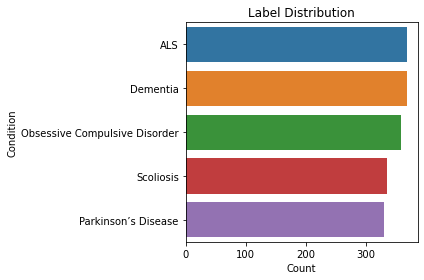

In [7]:
# Visualize label distribution
sns.countplot(data=df, y='label', order=df['label'].value_counts().index)
plt.title("Label Distribution")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.tight_layout()
plt.show()


Description Length Stats:
count     1759.000000
mean      2016.455941
std       2103.186945
min          9.000000
25%        747.000000
50%       1406.000000
75%       2429.500000
max      21765.000000
Name: desc_length, dtype: float64


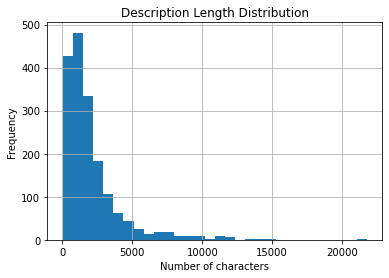

In [8]:
# Description length analysis
df['desc_length'] = df['description'].apply(len)
print("\nDescription Length Stats:")
print(df['desc_length'].describe())
df['desc_length'].hist(bins=30)
plt.title("Description Length Distribution")
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.show()

In [9]:
print(df[df['desc_length'] > 20000]['label'].values[0])
df[df['desc_length'] > 20000]['description'].values[0]

Obsessive Compulsive Disorder


'RECRUITMENT:||Potential participants will be referred to our program by their treating clinicians, who will be made aware of our study through direct clinician-clinician letters and emails. Subjects may also learn of the study through consumer advocacy groups such as the International OCD Foundation (IOCDF), local non-profit organizations and local support group meetings and through the normals avenues that they share information.||ENROLLMENT:||A subject is considered enrolled upon signing informed consent, deemed eligible to be screened by the investigator. Decision-making capacity, which includes understanding, appreciation, reasoning and ability to express a choice, will be assessed as part of the informed consent process. The informed consent process will include discussions with the patient\'s family and referring clinician. Medical records will be carefully reviewed to determine adequacy of past treatments including CBT.||SCREENING:||Potential subjects meeting inclusion/exclusio

In [10]:
# Identify outliers based on length
outlier_threshold = 100
outliers = df[df['desc_length'] < outlier_threshold]
outliers_sorted = outliers.sort_values(by='desc_length', ascending=True)
outliers_sorted

,nctid,description,label,desc_length
448,NCT00956085,see above,Obsessive Compulsive Disorder,9
1689,NCT03693898,See above,Scoliosis,9
985,NCT00748488,no extensive description,Parkinson’s Disease,24
1596,NCT00989495,The study has been completed.,Scoliosis,29
406,NCT02422290,See Brief Summary for description.,Obsessive Compulsive Disorder,34
192,NCT01933321,There is no more extensive information,ALS,38
127,NCT04288856,This study is an extension study of NCT03626012.,ALS,48
541,NCT01695291,Please see the brief summary for study descrip...,Obsessive Compulsive Disorder,51
365,NCT00539513,"Due to limited participation, this study has c...",ALS,52
350,NCT03491462,Screening of up to 4 weeks Treatment of up to ...,ALS,54


In [11]:
df[df['nctid']=='NCT03491462']['description'].values[0]

'Screening of up to 4 weeks Treatment of up to 76 weeks'

In [12]:
df[df['nctid']=='NCT00768313']['description'].values[0]

'screw purchase was to be recorded but study has been withdrawn.'

In [13]:
# Remove records with too-short descriptions (length < 55)
df = df[df['desc_length'] >= 60]

'''
I found a few records with very short descriptions (less than 60 characters), 
which are unlikely to provide meaningful context for the label. 
Including these could introduce bias into the model's predictions, so they were removed prior to training
'''



"\nI found a few records with very short descriptions (less than 60 characters), \nwhich are unlikely to provide meaningful context for the label. \nIncluding these could introduce bias into the model's predictions, so they were removed prior to training\n"

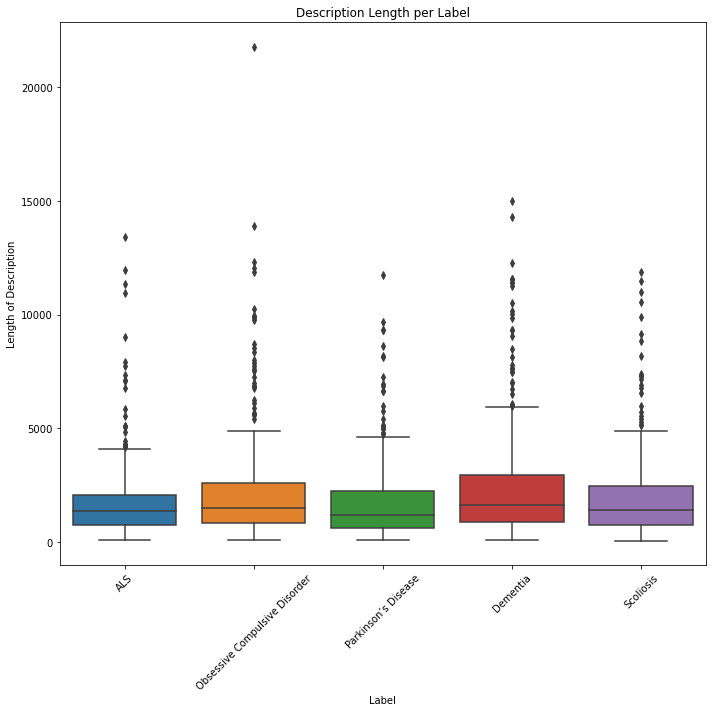

'\nDementia has a slightly higher median and a wider IQR , suggesting more variability in description\nParkinson’s Disease and Obsessive Compulsive Disorder also show moderate variability.\nThere are many outliers in all categories, especially above 5000 characters — indicating that some descriptions \n  are significantly longer than the majority.\n\nHigh number of outliers suggests inconsistent formatting or documentation styles across datasets.\nMay require normalization or truncation of text length before using this data for modeling. \ncan be achived after excluding stop words and lemmatization\n'

In [14]:
# Boxplot by label to visualize distribution
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='label', y='desc_length')
plt.xticks(rotation=45)
plt.title("Description Length per Label")
plt.ylabel("Length of Description")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

'''
Dementia has a slightly higher median and a wider IQR , suggesting more variability in description
Parkinson’s Disease and Obsessive Compulsive Disorder also show moderate variability.
There are many outliers in all categories, especially above 5000 characters — indicating that some descriptions 
  are significantly longer than the majority.

High number of outliers suggests inconsistent formatting or documentation styles across datasets.
May require normalization or truncation of text length before using this data for modeling. 
can be achived after excluding stop words and lemmatization
'''


Average Description Length by Label:
label
ALS                              1742.269231
Parkinson’s Disease              1745.808511
Scoliosis                        1974.690691
Obsessive Compulsive Disorder    2230.774648
Dementia                         2414.521739
Name: desc_length, dtype: float64


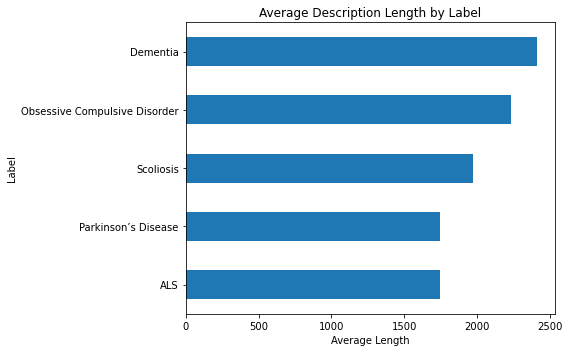

'\nDementia has the highest average description length (~2415 characters), \nindicating that its clinical descriptions may be more detailed or complex.\n\nObsessive Compulsive Disorder also has relatively longer descriptions, \npossibly reflecting elaborate clinical narratives or inclusion criteria.\n\nALS and Parkinson’s Disease have the shortest average descriptions, \nwhich may imply simpler descriptions or more standardized documentation.\n'

In [15]:
# Correlation-like check: average length by label
avg_lengths = df.groupby('label')['desc_length'].mean().sort_values()
print("Average Description Length by Label:")
print(avg_lengths)

avg_lengths.plot(kind='barh', figsize=(8, 5))
plt.title("Average Description Length by Label")
plt.xlabel("Average Length")
plt.ylabel("Label")
plt.tight_layout()
plt.show()

'''
Dementia has the highest average description length (~2415 characters), 
indicating that its clinical descriptions may be more detailed or complex.

Obsessive Compulsive Disorder also has relatively longer descriptions, 
possibly reflecting elaborate clinical narratives or inclusion criteria.

ALS and Parkinson’s Disease have the shortest average descriptions, 
which may imply simpler descriptions or more standardized documentation.
'''


Generating word clouds...


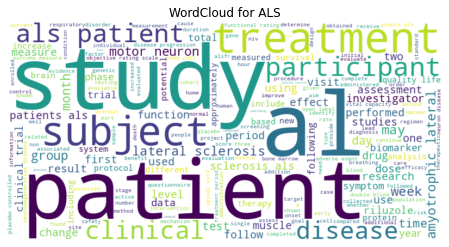

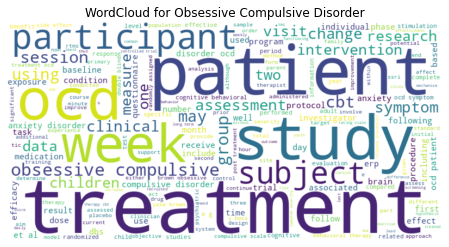

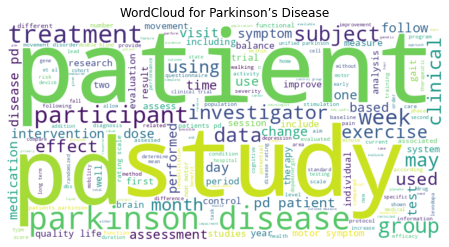

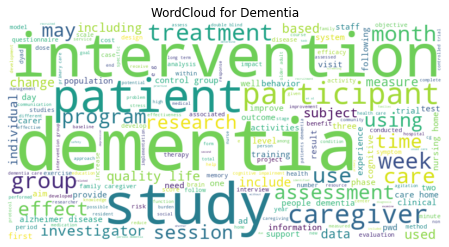

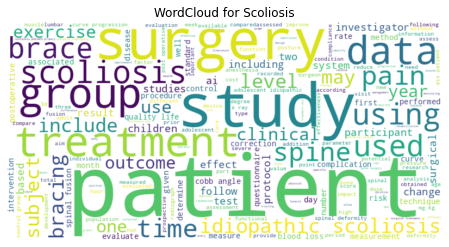

'\nInsights:\n\nI can see set of key words for each label, this means using key words we can best describe labels \nThis supports that the classifier can likely distinguish conditions using bag-of-words or TF-IDF approaches.\n'

In [16]:

# Word cloud for each label
stop_words = set(stopwords.words('english') + list(string.punctuation))
def clean_text(text):
    return ' '.join([word for word in text.lower().split() if word not in stop_words])

print("\nGenerating word clouds...")
for label in df['label'].unique():
    subset = df[df['label'] == label]
    text = " ".join(subset['description'].dropna().astype(str))
    cleaned_text = clean_text(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {label}")
    plt.show()
    

'''
I can see set of key words for each label, this means using key words we can best describe labels 
This supports that the classifier can likely distinguish conditions using bag-of-words or TF-IDF approaches.
'''

In [17]:

import random
# Print 3 random descriptions
for desc in random.sample(list(df['description']), 3):
    print(desc)
    
'''  
preprocessing (like removing punctuation, lowercasing, etc.), it's helpful to look at a few 
raw descriptions from our dataset. 
This gives a feel for the structure and noise in the text

'''

As abrupt cessation of antidepressant medication can cause distressing symptoms (including and not limited to worsened mood, irritability/agitation, anxiety, dizziness, confusion, and headache), the aim of this study is to compare the tolerance of two tapering regimens with the hypothesis that tapering the antidepressant dose over the course of two weeks will yield less discontinuation symptoms than a one week taper regimen. Additionally, it is suspected that discontinuing medications that inhibit the serotonin transporter , such as selective serotonin reuptake inhibitors (SSRI) and serotonin norepinephrine reuptake inhibitors (SNRI) will have a greater difference in the frequency of discontinuation symptoms between the two and one-week tapering regimens versus antidepressants that don't inhibit serotonin transporter.||Demographic and clinical features will also be identified that may predict discontinuation symptoms with the hypothesis that patients on SSRIs and SNRIs may experience m

"  \npreprocessing (like removing punctuation, lowercasing, etc.), it's helpful to look at a few \nraw descriptions from our dataset. \nThis gives a feel for the structure and noise in the text\n\n"

In [18]:
for desc in random.sample(list(df['description']), 3):
    print("\n--- Original ---")
    print(desc)

    print("\n--- Cleaned ---")
    print(clean_text(desc))
    
'''    
Upon reviewing several trial descriptions, I noticed that the text included a mix of 
uppercase and lowercase letters, irrelevant punctuation (e.g., commas, colons), 
and common stopwords such as ‘the’, ‘and’, and ‘have’. 

Additionally, medical terms appeared in uppercase followed by lowercass. 
Based on this, I decided to lowercase all text, 
remove punctuation and stopwords, and apply lemmatization to standardize terms while preserving meaning
'''


--- Original ---
Adolescent idiopathic scoliosis (AIS) is one of the most prevalent spinal deformity that may progress sharply during growth. According to the severity of the curve, the major treatment approaches for patient with AIS include exercises, bracing and surgery, to correct, prevent or stop the progression of the deformity.In North America, Scoliosis Research Society (SRS) has been published the standard of care for AIS: patients with curves between 10 and 25° should be observation who are still growing. While in the Europe, the International Scientific Society on Scoliosis Orthopaedic and Rehabilitation Treatment (SOSORT) has recommended that the physiotherapeutic scoliosis-specific exercises should be the first step to treat idiopathic scoliosis to prevent/limit progression of the deformity. Three-dimensionally integrated exercise for scoliosis is based the theory of physiotherapeutic scoliosis specific exercises, and consists of patient education, 3-dimension self-correct

'    \nUpon reviewing several trial descriptions, I noticed that the text included a mix of \nuppercase and lowercase letters, irrelevant punctuation (e.g., commas, colons), \nand common stopwords such as ‘the’, ‘and’, and ‘have’. \n\nAdditionally, medical terms appeared in uppercase followed by lowercass. \nBased on this, I decided to lowercase all text, \nremove punctuation and stopwords, and apply lemmatization to standardize terms while preserving meaning\n'

In [9]:
# !pip install spac
# !python -m spacy download en_core_web_sm

# =============== Step 2: Preprocessing ===============

In [21]:

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import spacy
import re

# # Load spaCy model
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english') + list(string.punctuation))


'''
I choose lemmatization over stemming to preserve more meaningful root words, 
which can be important in medical contexts. For vectorization, 

I am using TF-IDF instead of CountVectorizer, as it reduces the impact of very common words 
while still capturing the relevance of rare but meaningful medical terms

'''

# def clean(text):
#     cleaned = ' '.join([word for word in text.lower().split() if word not in stop_words])
#     return cleaned



# Clean, lemmatize, and remove stopwords
def clean_and_lemmatize(text):
    if pd.isnull(text):
        return ""

    # Lowercase and remove non-letters
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Process with spaCy
    doc = nlp(text)

    # Lemmatize and filter out stopwords and short tokens
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha and len(token.lemma_) > 2
    ]

    return " ".join(tokens)

# Apply the function to each description using lambda
df["clean_description"] = df["description"].apply(lambda x: clean_and_lemmatize(x))

X = df['clean_description']
y = df["label"]

In [22]:

# Set max column width to display full text
pd.set_option('display.max_colwidth', None)
df[['description', 'clean_description']].sample(3)

,description,clean_description
1544,"Adolescent Idiopathic scoliosis (AIS) is a three-dimensional deformity of the spine, characterized by a lateral curvature and vertebral rotation. Its prevalence is estimated to be 2.5% in children between aged 10 and 16 in Hong Kong. Curve progression occurs during pubertal growth spurt. If the primary curve does not exceed 40 degree at skeletal maturity, it is unlikely to continue to progress, and there are little or no long-term clinical consequences. However, if the curve progresses beyond 50 degree during adolescence, it may cause functional limitation, accelerated disc degeneration with potential neurological deficit, cosmetic concerns, decreased quality of life, and possible progression in adulthood. Thus, surgical correction of the deformity with instrumented spinal fusion is usually recommended if the curve reaches 50 degree during adolescence.||Currently, spinal bracing is the only the only non-operative treatment supported with high-quality evidence that can prevent curve progression. In a randomized controlled trial, Weinstein et al. recently reported in the New England Journal of Medicine that bracing was effective in preventing curve progression to threshold for surgery in 72% of cases. The trial was terminated early due to the treatment benefit in favor of bracing. Nonetheless, the authors reported a treatment failure rate of 25% in the randomized cohort, which was similar to previous published studies. Hence, despite the best available non-operative treatment, the number of adolescents ultimately requiring surgery remains substantial. Surgery is associated with medical comorbidities, can cause psychosocial stress to the children and their families, and has significant financial impact on healthcare, with the total costs of spinal surgery to correct AIS ranked second only to appendicitis among children 10 to 17 years of age. Consequently, further effective strategies to prevent scoliosis progression in children are needed.||Scoliosis-specific exercise (SSE) has been proposed as an additional non-operative intervention that may reduce curve progression during the adolescent growth spurt. However, the standard of care for non-operative treatment of AIS varies widely between North America and Europe, and the use of SSE is not universally accepted. SSE is a potentially low-cost intervention that will be of substantial benefit even if a relative risk reduction in curve progression or reaching the threshold for surgery is reduced in a modest proportion of those participating.||SSE, as opposed to generalized physiotherapy, consists of individually-adapted exercises that aim to promote spinal realignment through self-correction and stabilization, as well as modulating patterns of trunk muscles recruitment. Electromyography (EMG) of paraspinal and abdominal muscles in AIS patients revealed disrupted patterns of muscles recruitment, which are associated with a disparity in trunk isometric rotation strength between sides. AIS patients demonstrate proprioceptive and balance control problems, along with a distorted body schema, resulting in a mismatch between the actual spinal alignment and the patients' internal representation of the body. SSE aims to reverse the anomalous patterns of muscle recruitment through training, and modify the body schema with visual and somatosensory feedback. This forms the theoretical neurophysiological basis for using this treatment strategy for AIS.||Schroth SSE is one of the most studied and widely-used schools of SSE. It is a technique tailored to the type of scoliosis and the curve magnitude of each patient. It is based on vertebrae deflections and sagittal corrections that result in horizontal vertebrae de-rotation. It uses rotational breathing and postural auto-correction to reverse the underlying impairments in spinal muscle function, postural control and proprioception which contribute to the development of curvature in AIS. Patients will also be give

In [23]:
'''
Since classes are fairly balanced, I used a stratified 80/20 split to preserve label distribution.

'''

'''
I choose LabelEncoder to convert categorical labels into numeric values required by scikit-learn classifiers. 
These numeric values are internally mapped back to class names during predictions.
'''

# Label encoding
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Vectorization 
# vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2), min_df=2)


# Count Vectorizer (TF-IDF alternative)
# vectorizer = CountVectorizer(max_features=5000, stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

'''
I am using TF-IDF because
    Handling noisy data with lots of shared/common words.
    Helps reduce the influence of common, less meaningful words.
    Works well with sparse and large feature sets.
    
will use TfidfVectorizer for Logistic Regression and SVM
& Use CountVectorizer only if you're testing with MultinomialNB

'''

"\nI am using TF-IDF because\n    Handling noisy data with lots of shared/common words.\n    Helps reduce the influence of common, less meaningful words.\n    Works well with sparse and large feature sets.\n    \nwill use TfidfVectorizer for Logistic Regression and SVM\n& Use CountVectorizer only if you're testing with MultinomialNB\n\n"

In [24]:
print("Number of unique tokens in vocabulary:", len(vectorizer.vocabulary_))

Number of unique tokens in vocabulary: 5000


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
temp_vec = CountVectorizer(stop_words="english")
temp_vec.fit(df["clean_description"])
word_counts = pd.DataFrame(temp_vec.vocabulary_.items(), columns=["token", "index"]).sort_values("index")
word_counts.head(10)

,token,index
11460,aaa,0
14676,aactivity,1
12872,aadc,2
12981,aal,3
4760,aamsc,4
3949,aan,5
11458,aap,6
7372,aapd,7
7382,aapdinduced,8
7378,aapds,9


# =============== Step 3: Model Training ===============

In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Option 1: Logistic Regression
modelLogistic = LogisticRegression(max_iter=1000)

# Option 2: Random Forest
modelRandom = RandomForestClassifier(n_estimators=100)

# Option 3: Support Vector Machine
modelSVC = LinearSVC()

modelLogistic.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)


Classification Report:
                               precision    recall  f1-score   support

                          ALS       0.81      0.88      0.84        73
                     Dementia       0.86      0.92      0.89        74
Obsessive Compulsive Disorder       0.93      0.89      0.91        71
          Parkinson’s Disease       0.86      0.74      0.80        66
                    Scoliosis       0.93      0.94      0.93        66

                     accuracy                           0.87       350
                    macro avg       0.88      0.87      0.87       350
                 weighted avg       0.88      0.87      0.87       350


Accuracy: 0.8742857142857143


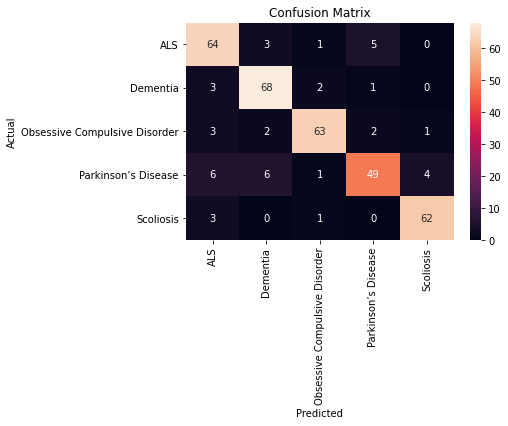

'\nLogistic Regression performs well with sparse high-dimensional data like TF-IDF vectors. \nIt also allows for inspecting feature importance, which aids explainability\n'

In [27]:
# LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

y_pred = modelLogistic.predict(X_test_vec)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

'''
Logistic Regression performs well with sparse high-dimensional data like TF-IDF vectors. 
It also allows for inspecting feature importance, which aids explainability
'''


Classification Report:
                               precision    recall  f1-score   support

                          ALS       0.80      0.90      0.85        73
                     Dementia       0.88      0.93      0.91        74
Obsessive Compulsive Disorder       0.94      0.87      0.91        71
          Parkinson’s Disease       0.89      0.74      0.81        66
                    Scoliosis       0.90      0.92      0.91        66

                     accuracy                           0.88       350
                    macro avg       0.88      0.88      0.88       350
                 weighted avg       0.88      0.88      0.88       350


Accuracy: 0.8771428571428571


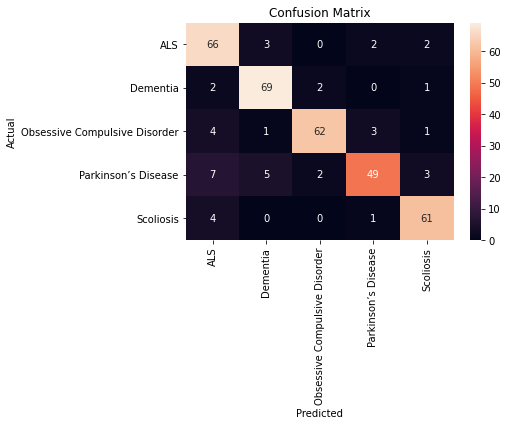

In [28]:
# RandomForestClassifier 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

modelRandom.fit(X_train_vec, y_train)
y_pred = modelRandom.predict(X_test_vec)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
                               precision    recall  f1-score   support

                          ALS       0.84      0.88      0.86        73
                     Dementia       0.87      0.93      0.90        74
Obsessive Compulsive Disorder       0.90      0.89      0.89        71
          Parkinson’s Disease       0.84      0.73      0.78        66
                    Scoliosis       0.93      0.95      0.94        66

                     accuracy                           0.88       350
                    macro avg       0.88      0.88      0.88       350
                 weighted avg       0.88      0.88      0.88       350


Accuracy: 0.8771428571428571


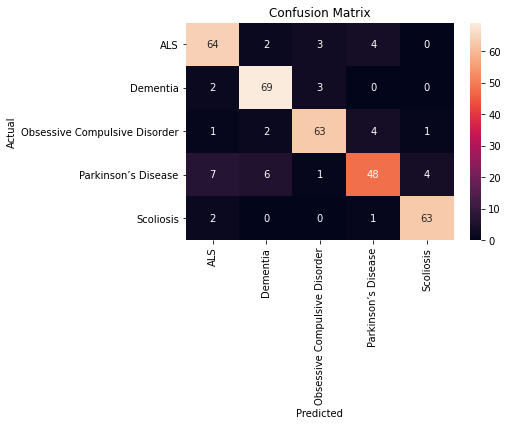

In [29]:
# Support Vector Machine

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

modelSVC.fit(X_train_vec, y_train)
y_pred = modelSVC.predict(X_test_vec)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

======  deep learning Model ======

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Vectorization options

# vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2), min_df=2)
# Count Vectorizer (alternative)
# vectorizer = CountVectorizer(max_features=5000, stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [31]:
# Replace classical ML models with a deep learning model

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Tokenization and padding
max_words = 10000
max_len = 300
embedding_dim = 128

# Fit tokenizer on training text
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to one-hot encoding
num_classes = len(set(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build a Bidirectional LSTM model
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
epochs = 5
batch_size = 32
model.fit(X_train_pad, y_train_cat, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1387397 (5.29 MB)
Trainable params: 1387397 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

11/11 [==============================] - 1s 44ms/step

Classification Report:
                               precision    recall  f1-score   support

                          ALS       0.89      0.85      0.87        73
                     Dementia       0.86      0.86      0.86        74
Obsessive Compulsive Disorder       0.93      0.87      0.90        71
          Parkinson’s Disease       0.83      0.79      0.81        66
                    Scoliosis       0.84      0.97      0.90        66

                     accuracy                           0.87       350
                    macro avg       0.87      0.87      0.87       350
                 weighted avg       0.87      0.87      0.87       350


Accuracy: 0.8685714285714285


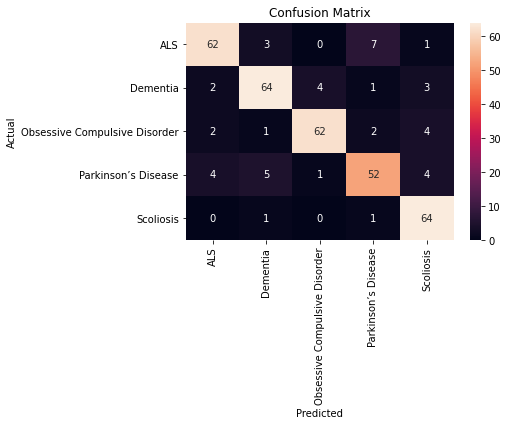

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

y_pred_probs = model.predict(X_test_pad)
y_pred = y_pred_probs.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

=============== Classical Modeling with Hyperparameter Tuning and Ensembling ===============


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score (Logistic): 0.9063824884792625

Best SVM Params: {'C': 1}
Best CV Score (SVM): 0.8963773681515617

Classification Report (Ensemble):
                               precision    recall  f1-score   support

                          ALS       0.84      0.86      0.85        73
                     Dementia       0.86      0.91      0.88        74
Obsessive Compulsive Disorder       0.90      0.87      0.89        71
          Parkinson’s Disease       0.82      0.76      0.79        66
                    Scoliosis       0.94      0.95      0.95        66

                     accuracy                           0.87       350
                    macro avg       0.87      0.87      0.87       350
                 weighted avg       0.87      0.87      0.87       350

Accuracy (Ensemble): 0.8714285714285714


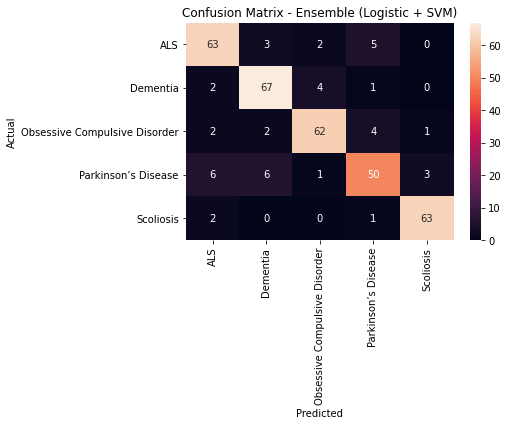

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Hyperparameter tuning for Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_log = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(X_train_vec, y_train)

print("\nBest Logistic Regression Params:", grid_log.best_params_)
print("Best CV Score (Logistic):", grid_log.best_score_)

# Hyperparameter tuning for SVM
svm = SVC(kernel='linear', probability=True)
svm_params = {
    'C': [0.1, 1, 10]
}
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_vec, y_train)

print("\nBest SVM Params:", grid_svm.best_params_)
print("Best CV Score (SVM):", grid_svm.best_score_)

# Create VotingClassifier ensemble with soft voting
voting_clf = VotingClassifier(estimators=[
    ('lr', grid_log.best_estimator_),
    ('svm', grid_svm.best_estimator_)
], voting='soft')

voting_clf.fit(X_train_vec, y_train)

# Evaluate on test set
y_pred_ensemble = voting_clf.predict(X_test_vec)

print("\nClassification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble, target_names=y_encoder.classes_))
print("Accuracy (Ensemble):", accuracy_score(y_test, y_pred_ensemble))

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix - Ensemble (Logistic + SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report (Full Ensemble):
                               precision    recall  f1-score   support

                          ALS       0.84      0.86      0.85        73
                     Dementia       0.85      0.92      0.88        74
Obsessive Compulsive Disorder       0.91      0.89      0.90        71
          Parkinson’s Disease       0.82      0.77      0.80        66
                    Scoliosis       0.97      0.94      0.95        66

                     accuracy                           0.88       350
                    macro avg       0.88      0.88      0.88       350
                 weighted avg       0.88      0.88      0.88       350

Accuracy (Full Ensemble): 0.8771428571428571


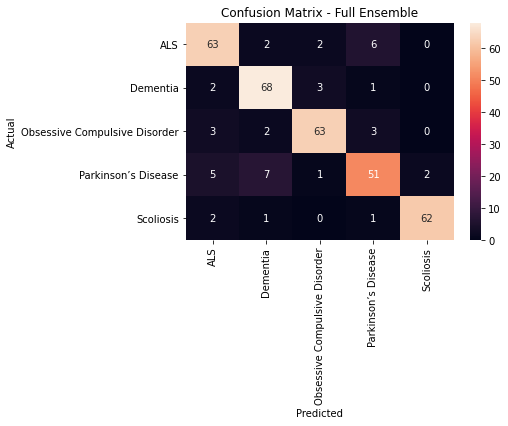

In [34]:
# =============== Ensembling ===============


from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Best estimators (based on your grid search and findings)
best_logreg = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=1000)
best_svm = SVC(kernel='linear', C=1, probability=True)
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit all base models
best_logreg.fit(X_train_vec, y_train)
best_svm.fit(X_train_vec, y_train)
best_rf.fit(X_train_vec, y_train)

# Ensemble: Soft Voting
ensemble_all = VotingClassifier(
    estimators=[
        ('lr', best_logreg),
        ('svm', best_svm),
        ('rf', best_rf)
    ],
    voting='soft'
)

# Train ensemble
ensemble_all.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred_ensemble_all = ensemble_all.predict(X_test_vec)

print("\nClassification Report (Full Ensemble):")
print(classification_report(y_test, y_pred_ensemble_all, target_names=y_encoder.classes_))
print("Accuracy (Full Ensemble):", accuracy_score(y_test, y_pred_ensemble_all))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble_all)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix - Full Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [35]:
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Initialize
nb = MultinomialNB()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit
nb.fit(X_train_vec, y_train)
xgb.fit(X_train_vec, y_train)
et.fit(X_train_vec, y_train)

# Extended ensemble
extended_ensemble = VotingClassifier(
    estimators=[
        ('lr', best_logreg),
        ('svm', best_svm),
        ('rf', best_rf),
        ('nb', nb),
        ('xgb', xgb),
        ('et', et)
    ],
    voting='soft'
)

extended_ensemble.fit(X_train_vec, y_train)
y_pred_extended = extended_ensemble.predict(X_test_vec)

print("\nExtended Ensemble Accuracy:", accuracy_score(y_test, y_pred_extended))
print(classification_report(y_test, y_pred_extended, target_names=y_encoder.classes_))

print("Accuracy (Full Ensemble):", accuracy_score(y_test, y_pred_extended))


Extended Ensemble Accuracy: 0.8914285714285715
                               precision    recall  f1-score   support

                          ALS       0.84      0.92      0.88        73
                     Dementia       0.86      0.95      0.90        74
Obsessive Compulsive Disorder       0.95      0.89      0.92        71
          Parkinson’s Disease       0.86      0.76      0.81        66
                    Scoliosis       0.95      0.94      0.95        66

                     accuracy                           0.89       350
                    macro avg       0.89      0.89      0.89       350
                 weighted avg       0.89      0.89      0.89       350

Accuracy (Full Ensemble): 0.8914285714285715


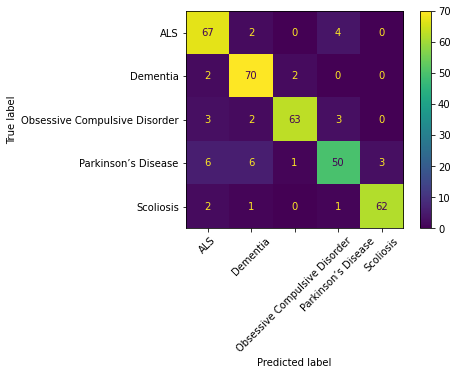

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_extended)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_encoder.classes_)
disp.plot(xticks_rotation=45)

In [40]:
# =============== Save the Ensemble Model and Vectorizer ===============


import os
import joblib

# Create the directory
os.makedirs("models", exist_ok=True)

# Save model and vectorizer
joblib.dump(extended_ensemble, "models/ensemble_model.joblib")
joblib.dump(vectorizer, "models/vectorizer.joblib")
joblib.dump(y_encoder, "models/label_encoder.joblib")

['models/label_encoder.joblib']

 =============== Thought Process  ===============

=============== Design Thinking ===============

In [ ]:
Ways to Improve Further
Switch from TF-IDF to contextual embeddings:
    Using BERT or SciBERT which has more medical terms understanding.

Add Named Entity Recognition (NER):

    Use spaCy’s or SciSpacy’s NER to extract drugs, symptoms, or trial types as structured features.
